In [3]:
import numpy as np
from sktime.classification.kernel_based import RocketClassifier
from sktime.transformations.panel.padder import PaddingTransformer

from classification import get_train_test_data

if __name__ == "__main__":
    X_train, y_train, X_test, y_test = get_train_test_data()

    # classifier = DummyClassifier(strategy="prior")  # 0.619
    # classifier = PaddingTransformer() * KNeighborsTimeSeriesClassifier()  # 0.857
    # classifier = TimeSeriesSVC()  # 0.761
    # classifier = PaddingTransformer() * TimeSeriesForestClassifier()  # 0.880
    # classifier = PaddingTransformer() * ResNetClassifier(n_epochs=20)  # 0.69
    # classifier = PaddingTransformer() * InceptionTimeClassifier(n_epochs=20, batch_size=16)  # 0.666
    # classifier = PaddingTransformer() * HIVECOTEV2()  # 0.762
    # classifier = PaddingTransformer() * ShapeletTransformClassifier(
    #     estimator=RotationForest(n_estimators=3),
    #     n_shapelet_samples=100,
    #     max_shapelets=10,
    #     batch_size=20,
    # )  # 0.857

    classifier = PaddingTransformer() * RocketClassifier()  # 0.928

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = np.mean(y_pred == y_test)
    print(acc)
    # correct if y_pred and y_test are 0, or y_pred, y_test are both not 0
    binary_acc = np.mean((y_pred == 0) & (y_test == 0) | ((y_pred != 0) & (y_test != 0)))
    print(binary_acc)

    # mlflow_sktime.save_model(sktime_model=classifier, path="model")


Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
Outlier detected. Skipping value.
0.9285714285714286
0.9761904761904762


In [4]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.75      0.86         4
           2       0.80      0.80      0.80         5
           3       0.86      0.86      0.86         7
           4       1.00      1.00      1.00         1

    accuracy                           0.93        42
   macro avg       0.92      0.88      0.90        42
weighted avg       0.93      0.93      0.93        42



[[25  0  0  0  0]
 [ 1  3  0  0  0]
 [ 0  0  4  1  0]
 [ 0  0  1  6  0]
 [ 0  0  0  0  1]]


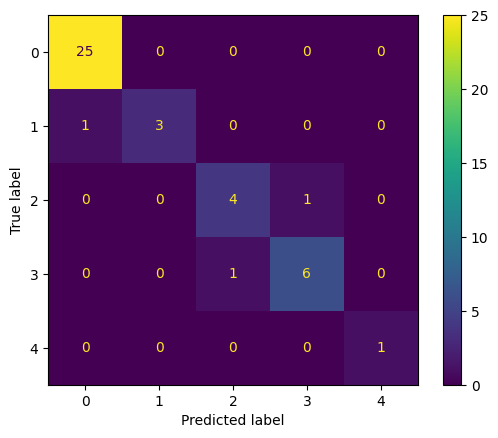

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig("cm.svg")